## Data Analysis Pyhton Project - Blinkit Analysis


### import library 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### import row data

In [8]:
df = pd.read_csv("BlinkIT Grocery Data.csv")

#### Sample Data

In [10]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


## Size of Data 

In [12]:
print('Size of Data : ',df.shape)

Size of Data :  (8523, 12)


### Field Info

In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Data Types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [25]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### Data Cleaning - 'LF' and 'reg'in 'item Fat Content ' values

In [28]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [30]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF' : 'Low Fat',
    'low Fat' : 'Low Fat',
    'reg' : 'Regular'
})

In [32]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat']


## Business Requirements

### KPI's Requirements

In [36]:
# Total Sales
total_sales = df['Sales'].sum()
# calculate Average Sales
avg_sales = df['Sales'].mean()
# calculate Number of Item sold 
num_items_sold = df['Sales'].count()
# calculate avarage rating
avg_rating = df['Rating'].mean()


# Display KPIs

print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales per Item: ${avg_sales:.0f}")
print(f"Number of Item Sold : ${num_items_sold:,.0f}")
print(f"Average Rating : ${avg_rating:.1f}")


Total Sales: $1,201,681.5
Average Sales per Item: $141
Number of Item Sold : $8,523
Average Rating : $4.0


## Charts Requirements

### Total Sales by Fat Content 

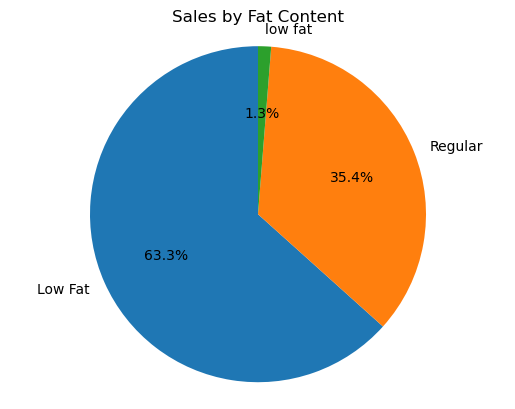

In [40]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, 
        labels= sales_by_fat.index, 
       autopct='%.1f%%', startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

### total sales by item type

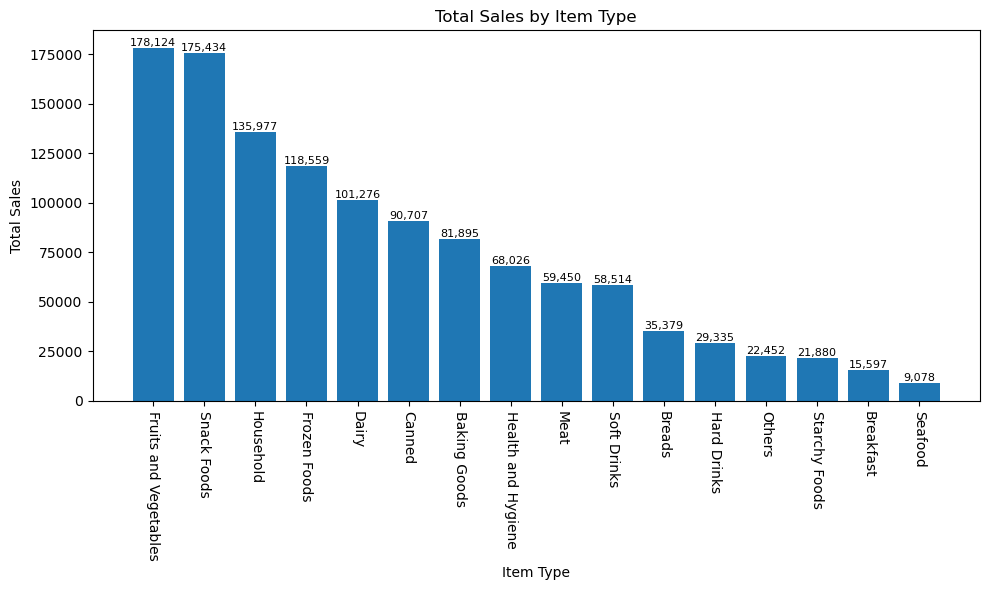

In [43]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation= -90) 
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
            f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom', fontsize= 8)

plt.tight_layout()
plt.show()

####  Fat Content by Outlet for Total Sales

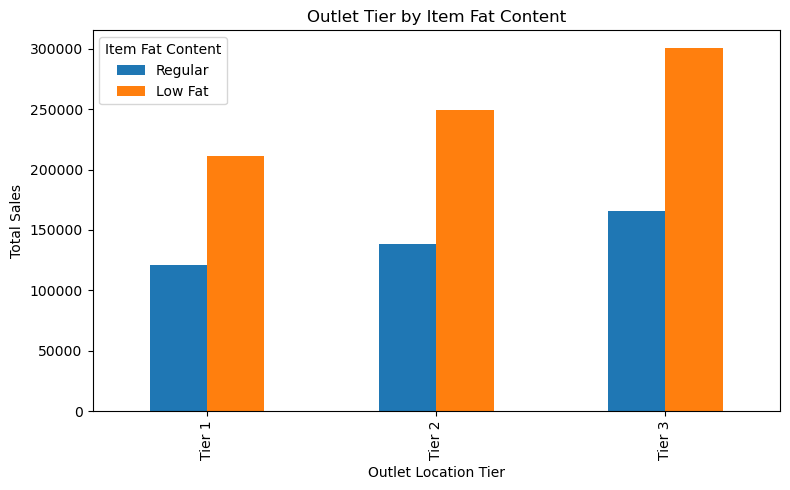

In [46]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind= 'bar', figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

## Total Sales by outlet Establishment

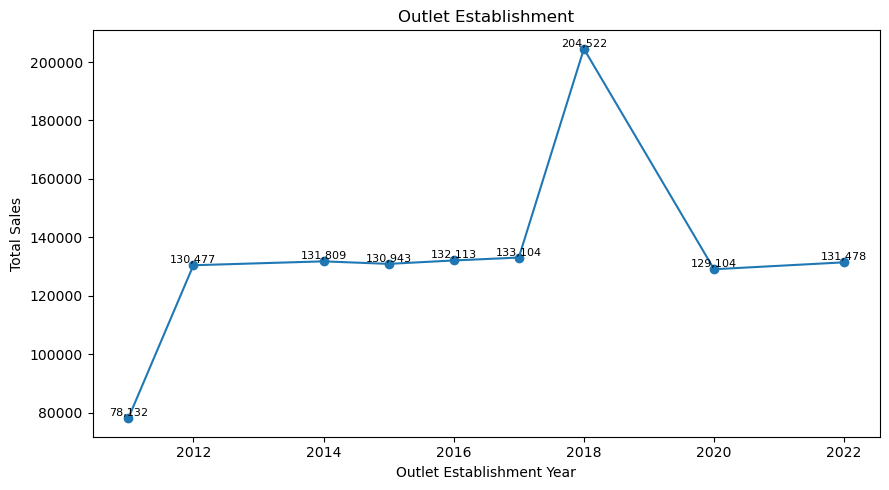

In [56]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker ='o',linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}' , ha = 'center', va = 'bottom', fontsize= 8)

plt.tight_layout()
plt.show()

### Sales by Outlet Size

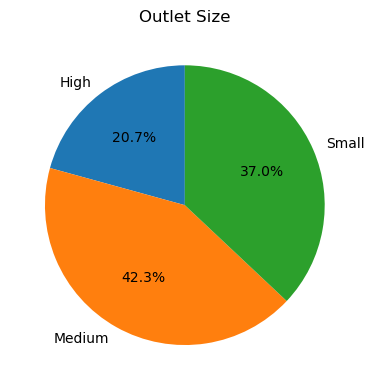

In [59]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, 
        labels= sales_by_size.index, 
       autopct='%.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

### Sales by Outlet Location

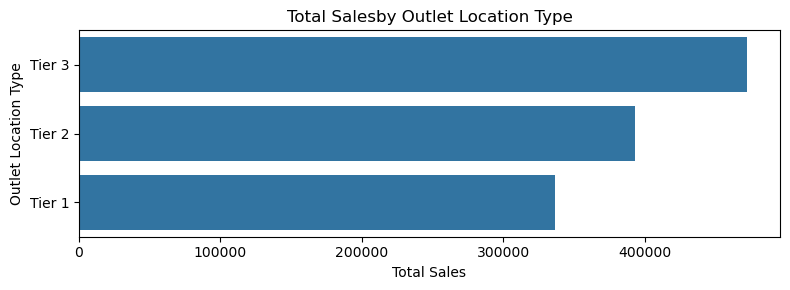

In [64]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_location) 

plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Total Salesby Outlet Location Type')

plt.tight_layout()
plt.show()